In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import imutils
from utility import util


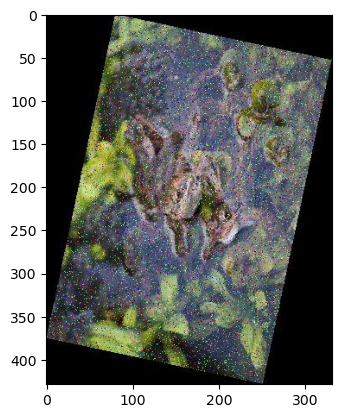

In [2]:
image = cv.imread('i3.jpg')
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

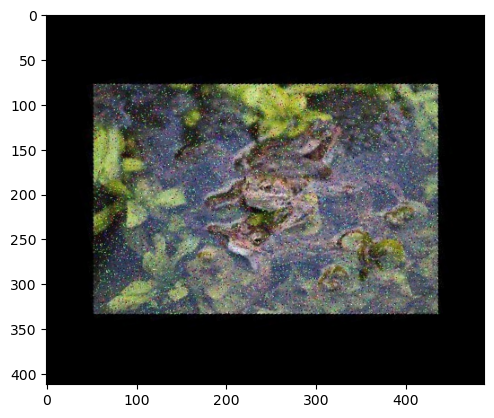

In [3]:
(h, w, d) = rgb_image.shape

warped = imutils.rotate_bound(rgb_image, 78)
plt.imshow(warped)

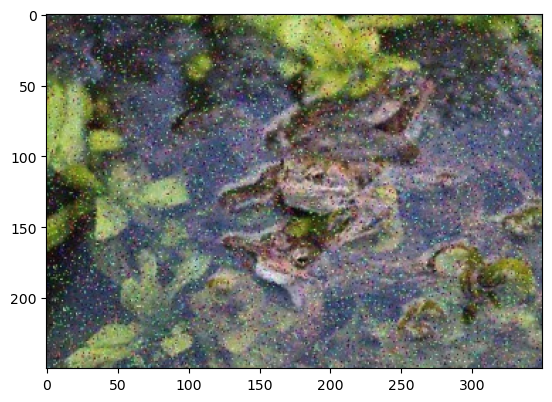

In [4]:
rows, cols, dim = warped.shape
ROI = (55, 78, 350, 250)  #(x0, y0, height, width)
croped_image = warped[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
plt.imshow(croped_image)

In [5]:
histSize = [256]
range = [0, 256]


def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col)
        plt.xlim(range)

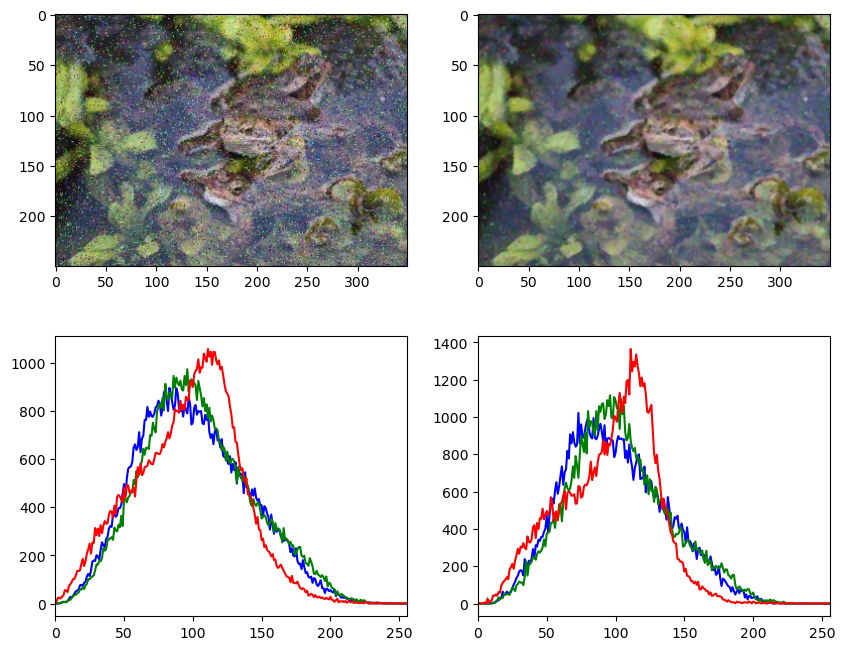

In [6]:
croped_image

median_image1 = cv.medianBlur(croped_image, 3)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(croped_image)
plt.subplot(gs[1])
plt.imshow(median_image1)
plt.subplot(gs[2])
plot_rgb_hist(croped_image, histSize, range)
plt.subplot(gs[3])
plot_rgb_hist(median_image1, histSize, range)

cv.imwrite("median_image1.jpg", median_image1)
plt.show()